In [1]:
import os
os.chdir(r'/Users/ryanmccrickerd/gdrive/rypy')

In [3]:
import numpy as np
import pandas as pd
import rypy as rp
from matplotlib import pyplot as plt
from scipy.stats import norm
import mpl
%matplotlib inline

In [4]:
nx = np.newaxis
mpl.config(scale=1.5,print_keys=False)

In [6]:
σ,ρ,v,κ = np.sqrt(0.02),-0.7,1,np.inf
θ = σ,ρ,v,κ

In [7]:
T = np.array([1/52,2/52,1/12,1/4,1/2,1])[:,nx]
M = ['1W','2W','1M','3M','6M','1Y']
Δ = np.linspace(1,99,21)[nx,:]/100
Δ = np.linspace(1,99,21)[nx,:]/100
k = (norm.ppf(Δ)*σ*np.sqrt(T))

In [8]:
pd.DataFrame(k,index=M,columns=Δ[0,:])

,0.01,0.059000000000000004,0.10800000000000001,0.157,0.20600000000000002,0.255,0.30400000000000005,0.35300000000000004,0.402,0.451,...,0.549,0.5980000000000001,0.647,0.6960000000000001,0.745,0.794,0.8430000000000001,0.892,0.9410000000000001,0.99
1W,-0.045623,-0.030657,-0.024264,-0.019746,-0.016089,-0.012921,-0.010059,-0.007398,-0.004867,-0.002415,...,0.002415,0.004867,0.007398,0.010059,0.012921,0.016089,0.019746,0.024264,0.030657,0.045623
2W,-0.064521,-0.043356,-0.034315,-0.027925,-0.022753,-0.018273,-0.014226,-0.010463,-0.006883,-0.003415,...,0.003415,0.006883,0.010463,0.014226,0.018273,0.022753,0.027925,0.034315,0.043356,0.064521
1M,-0.094973,-0.063818,-0.050510,-0.041105,-0.033492,-0.026897,-0.020940,-0.015400,-0.010132,-0.005027,...,0.005027,0.010132,0.015400,0.020940,0.026897,0.033492,0.041105,0.050510,0.063818,0.094973
3M,-0.164498,-0.110537,-0.087486,-0.071196,-0.058010,-0.046587,-0.036270,-0.026674,-0.017549,-0.008707,...,0.008707,0.017549,0.026674,0.036270,0.046587,0.058010,0.071196,0.087486,0.110537,0.164498
6M,-0.232635,-0.156322,-0.123723,-0.100686,-0.082038,-0.065884,-0.051293,-0.037723,-0.024817,-0.012314,...,0.012314,0.024817,0.037723,0.051293,0.065884,0.082038,0.100686,0.123723,0.156322,0.232635
1Y,-0.328995,-0.221073,-0.174971,-0.142392,-0.116019,-0.093174,-0.072539,-0.053349,-0.035097,-0.017414,...,0.017414,0.035097,0.053349,0.072539,0.093174,0.116019,0.142392,0.174971,0.221073,0.328995


In [9]:
C = rp.pricer(T,k,θ)

In [10]:
BSV = rp.surface(T,k,C)

In [11]:
pd.DataFrame(BSV,index=M,columns=Δ[0,:])

,0.01,0.059000000000000004,0.10800000000000001,0.157,0.20600000000000002,0.255,0.30400000000000005,0.35300000000000004,0.402,0.451,...,0.549,0.5980000000000001,0.647,0.6960000000000001,0.745,0.794,0.8430000000000001,0.892,0.9410000000000001,0.99
1W,0.221012,0.174111,0.152517,0.136493,0.122947,0.110707,0.099167,0.087943,0.076767,0.065506,...,0.048155,0.050543,0.056403,0.063216,0.070545,0.078446,0.087236,0.097626,0.111556,0.141400
2W,0.225454,0.180563,0.159823,0.144415,0.131389,0.119630,0.108571,0.097863,0.087285,0.076760,...,0.059010,0.057614,0.060970,0.066193,0.072311,0.079147,0.086888,0.096122,0.108555,0.135189
1M,0.227349,0.185799,0.166552,0.152252,0.140174,0.129299,0.119110,0.109305,0.099706,0.090258,...,0.073289,0.068586,0.068128,0.070601,0.074686,0.079837,0.086014,0.093617,0.104042,0.126622
3M,0.222907,0.187966,0.171792,0.159810,0.149734,0.140715,0.132330,0.124338,0.116597,0.109041,...,0.094752,0.088638,0.084053,0.081584,0.081252,0.082690,0.085607,0.090066,0.096943,0.113071
6M,0.215620,0.185623,0.171799,0.161602,0.153068,0.145469,0.138443,0.131785,0.125368,0.119119,...,0.107080,0.101441,0.096331,0.092105,0.089141,0.087676,0.087778,0.089536,0.093560,0.105097
1Y,0.205612,0.180738,0.169368,0.161035,0.154102,0.147964,0.142321,0.137001,0.131893,0.126926,...,0.117249,0.112520,0.107903,0.103491,0.099444,0.095998,0.093445,0.092136,0.092689,0.098897


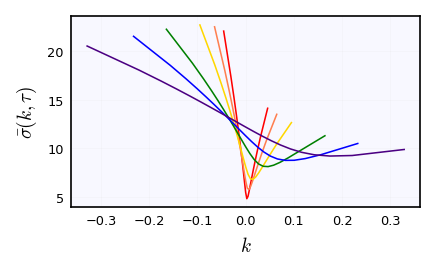

In [12]:
plot,axes = plt.subplots()
for i in range(len(T[:,0])):
    axes.plot(k[i,:],100*BSV[i,:])
    axes.set_xlabel(r'$k$')
    axes.set_ylabel(r'$\bar{\sigma}(k,\tau)$')

In [13]:
ψ1 = (BSV[:,2] - BSV[:,0])/(k[:,2] - k[:,0])
ψ2 = (BSV[:,2] - 2*BSV[:,1] + BSV[:,0])/(k[:,2] - k[:,1])**2

Text(0, 0.5, '$\\log \\psi_1(\\tau)$')

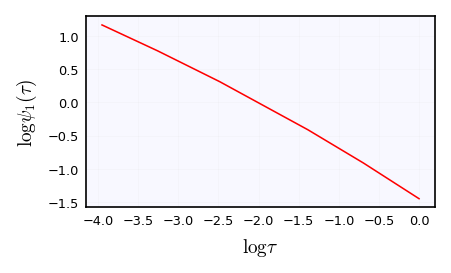

In [14]:
plot,axes = plt.subplots()
axes.plot(np.log(T[:,0]),np.log(np.sign(ρ)*ψ1))
axes.set_xlabel(r'$\log \tau$')
axes.set_ylabel(r'$\log \psi_1(\tau)$')

Text(0, 0.5, '$\\log \\psi_2(\\tau)$')

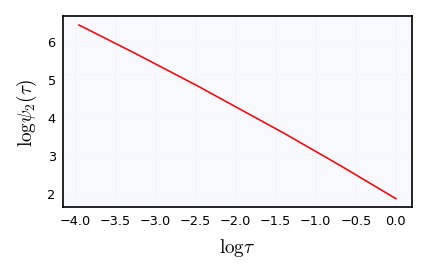

In [15]:
plot,axes = plt.subplots()
axes.plot(np.log(T[:,0]),np.log(ψ2))
axes.set_xlabel(r'$\log \tau$')
axes.set_ylabel(r'$\log \psi_2(\tau)$')

Now generate everything together

In [16]:
plt.rcParams['figure.figsize'] = [2*2*1.618,2*3]

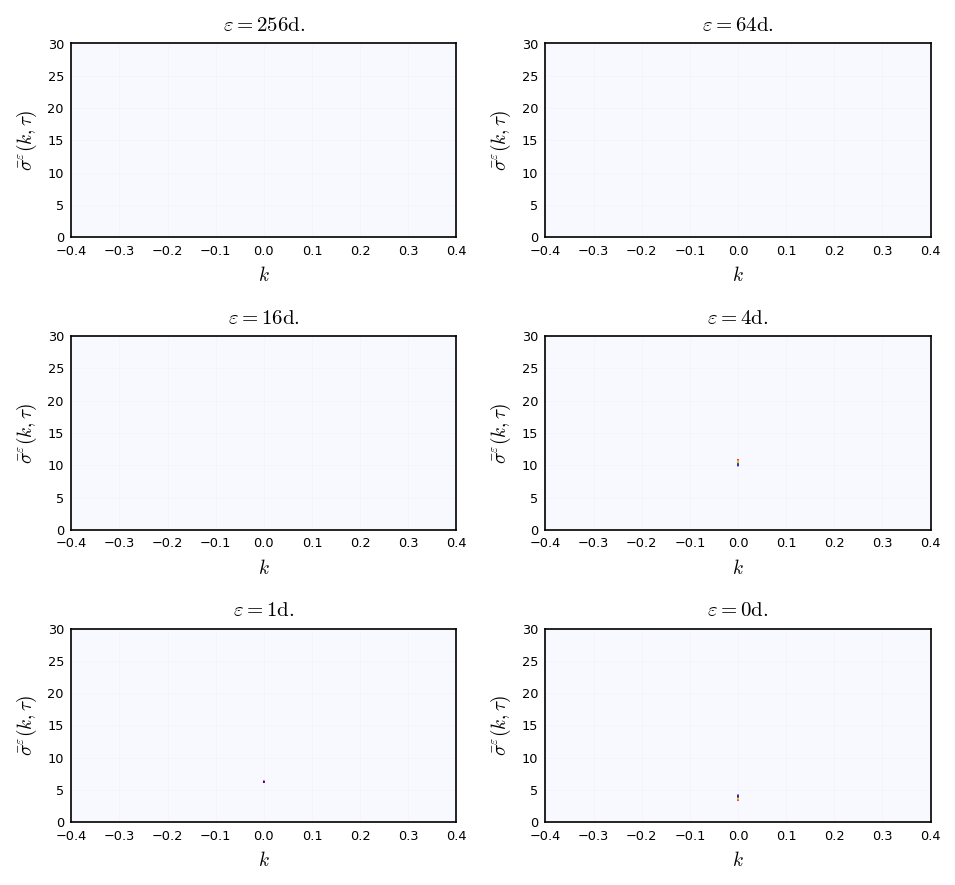

In [17]:
# σ,ρ,v = np.sqrt(0.02),-0.7,1
σ,ρ,v = np.sqrt(0.02),   0,1

S = np.array([['256','64'],['16','4'],['1','0']]) # array for timescale in titles

# for surface
# n = 51
# Δ = np.linspace(1,99,n)[nx,:]/100 
# T = np.array([1/52,2/52,1/12,3/12,6/12,1])[:,nx]
# k = norm.ppf(Δ)*σ*np.sqrt(T)

# for skew & curvature
n = 3
Δ = np.linspace(49.9,50.1,n)[nx,:]/100 
T = np.exp(np.linspace(-6,0,51))[:,nx] 
k = norm.ppf(Δ)*σ*np.sqrt(T)

κ_range = np.array([[1,4],[16,64],[256,np.inf]])

plot,axes = plt.subplots(3,2)
ψ1 = np.zeros((6,len(T[:,0])))
ψ2 = np.zeros((6,len(T[:,0])))
g = -1
for i in range(3):
    for j in range(2):
        κ = κ_range[i,j]
        θ = σ,ρ,v,κ
        C = rp.pricer(T,k,θ)
        V = rp.surface(T,k,C)
        for h in range(6):
            axes[i,j].plot(k[h,:],100*V[h,:])
            axes[i,j].set_xlabel(r'$k$')
            axes[i,j].set_ylabel(r'$\bar{\sigma}^{\varepsilon}(k,\tau)$')
            axes[i,j].set_title(r'$\varepsilon=%s\mathrm{d.}$'%S[i,j])
            axes[i,j].set_xlim([-0.4,0.4])
            axes[i,j].set_ylim([0,30])
        g += 1
        # finite-differences
        m = int((n - 1)/2)
        ψ1[g,:] = (V[:,m+1] - V[:,m-1])/(k[:,m+1] - k[:,m-1])
        ψ2[g,:] = (V[:,m+1] - 2*V[:,m] + V[:,m-1])/(k[:,m+1] - k[:,m])**2
plt.tight_layout()
fname = 'surface1'
if ρ == 0: fname = 'surface2'
plt.savefig(fname)

In [140]:
# plt.rcParams['figure.figsize'] = [3*1.618,2.5]
plt.rcParams['figure.figsize'] = [2*1.618,2*1]

In [141]:
if ρ != 0:
    plot,axes = plt.subplots()
    for i in range(6):
        
#         axes[0].plot(T[:,0],np.sign(ρ)*ψ1[i,:])
#         axes[0].set_xlabel(r'$\tau$')
#         axes[0].set_ylabel(r'$\psi_1(\tau)$')
        
        axes.plot(np.log(T[:,0]),np.log(np.sign(ρ)*ψ1[i,:]))
        axes.set_xlabel(r'$\log\ \tau$')
        axes.set_ylabel(r'$\log\ \psi^{\varepsilon}_1(\tau)$')
        
#     axes.text(-4.5, -2.4, r'$\varepsilon = 256\mathrm{d.}$',fontsize='small')
#     axes.text(-4.5, 1.9, r'$\varepsilon = 0\mathrm{d.}$',fontsize='small')
    plt.tight_layout()
    plt.savefig('skew')

In [142]:
plt.rcParams['figure.figsize'] = [2*1.618,2*1]

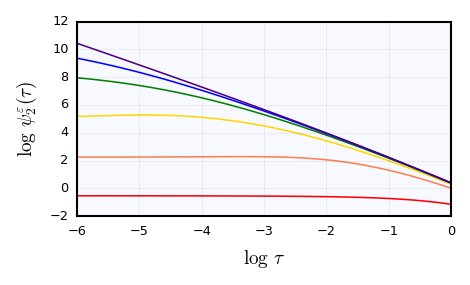

In [143]:
if ρ == 0:
    plot,axes = plt.subplots()
    for i in range(6):
        
#         axes[0].plot(T[:,0],ψ2[i,:])
#         axes[0].set_xlabel(r'$\tau$')
#         axes[0].set_ylabel(r'$\psi_2(\tau)$')
        
        axes.plot(np.log(T[:,0]),np.log(ψ2[i,:]))
        axes.set_xlabel(r'$\log\ \tau$')
        axes.set_ylabel(r'$\log\ \psi^{\varepsilon}_2(\tau)$')
        
#     axes.text(-4.5, -2.4, r'$\varepsilon = 256\mathrm{d.}$',fontsize='small')
#     axes.text(-4.5, 1.9, r'$\varepsilon = 0\mathrm{d.}$',fontsize='small')
    plt.tight_layout()
    plt.savefig('curvature')

In [19]:
from IPython.display import IFrame
IFrame('https://arxiv.org/pdf/1406.2661.pdf', width=800, height=450)